In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#check the dataset
train = pd.read_csv('/content/train_file.csv')
train

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084
...,...,...,...,...,...,...,...,...,...,...,...
55927,jQ3CeLRCb9,Fidel Castro Lashes Out at Obama After Cuba Visit,Retired Cuban leader Fidel Castro slammed Pres...,Wall Street Journal,obama,2016-03-29 01:35:06,794,10,5,-0.135417,-0.055902
55928,akNYeJ8opY,JOHN CRISP | Obama's strategic reaction to Bru...,President Obama caught some predictable flak f...,Kitsap Sun,obama,2016-03-29 01:35:08,0,0,0,0.236228,0.056110
55929,n2DGs0c8IG,Think Trump's 45 Percent Tariffs Are Bad? Try ...,While Trump wants to put large tariffs on impo...,Huffington Post,obama,2016-03-29 01:35:09,102,4,0,0.025747,0.114820
55930,P0EBiaSEjq,Microsoft finally releases giant Surface,Microsoft’s business customers are finally beg...,TechEye,microsoft,2016-03-29 01:38:00,0,0,0,0.000000,-0.028296


In [30]:
train.describe().round(2)

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.00,55932.00,55932.00,55932.00,55932.00
mean,132.05,4.55,14.30,-0.01,-0.03
std,722.93,21.14,76.65,0.14,0.14
min,-1.00,-1.00,-1.00,-0.84,-0.76
25%,0.00,0.00,0.00,-0.08,-0.12
50%,6.00,0.00,0.00,0.00,-0.03
75%,37.00,2.00,4.00,0.06,0.06
max,49211.00,1267.00,3716.00,0.96,0.96


In [58]:
## refer to https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python/26809325
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)
#I should use loop function...but...

x = train['Facebook']
y = train['GooglePlus']


#correct only if nx=ny
#d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
#print ("d by the 1st method = " + str(d))
#if (len(x) != len(y)):
    #print("The first method is incorrect because nx is not equal to ny.")

#correct for more general case including nx !=ny
print ("d by the more general 2nd method = " + str(cohen_d(x,y)))

d by the more general 2nd method = 0.24930914400402376


In [ ]:
#!pip install pingouin

In [60]:
stats.ttest_ind(train['Facebook'], train['GooglePlus'])

Ttest_indResult(statistic=41.69206289304207, pvalue=0.0)

In [79]:
Facebook_var = np.var(train['SentimentHeadline'], ddof=1)  # Aの不偏分散
SH_var = np.var(train['SentimentTitle'], ddof=1)  # Bの不偏分散
Facebook_df = len(train['SentimentHeadline']) - 1  # Aの自由度
SH_df = len(train['SentimentTitle']) - 1  # Bの自由度
f = Facebook_var / SH_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, Facebook_df, SH_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, Facebook_df, SH_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        1.081
p-value:  0.0


In [ ]:
train['Facebook']

In [80]:
stats.ttest_ind(train['SentimentHeadline'], train['SentimentTitle'], equal_var=False)

Ttest_indResult(statistic=-27.717744210004703, pvalue=1.5951970440576804e-168)

In [27]:
#stats.mannwhitneyu(train['Facebook'], train['SentimentHeadline'], alternative='two-sided')

MannwhitneyuResult(statistic=2649356965.0, pvalue=0.0)

In [28]:
#stats.ttest_ind(train['Facebook'], train['SentimentHeadline'])

Ttest_indResult(statistic=43.2085687595735, pvalue=0.0)

In [29]:
#stats.ttest_rel(train['Facebook'], train['SentimentHeadline'])

Ttest_relResult(statistic=43.20858128415124, pvalue=0.0)

In [25]:
GooglePlus_var = np.var(train['GooglePlus'], ddof=1)  # Aの不偏分散
SH_var = np.var(train['SentimentHeadline'], ddof=1)  # Bの不偏分散
GooglePlus_df = len(train['GooglePlus']) - 1  # Aの自由度
SH_df = len(train['SentimentHeadline']) - 1  # Bの自由度
f = GooglePlus_var / SH_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, GooglePlus_df, SH_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, GooglePlus_df, SH_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        21836.875
p-value:  0.0


In [26]:
stats.ttest_ind(train['GooglePlus'], train['SentimentHeadline'], equal_var=False)

Ttest_indResult(statistic=51.2568468114039, pvalue=0.0)

Text(0.5, 1.0, 'Scatter_title&headline')

<Figure size 2250x2250 with 0 Axes>

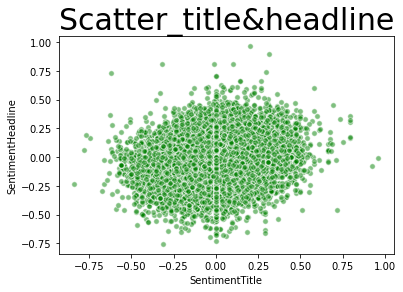

In [4]:
plt.figure(figsize=(15,15),dpi=150)
train.plot.scatter(x='SentimentTitle', y='SentimentHeadline', s=30, alpha=0.5, c='green',edgecolors="w")
plt.title('Scatter_title&headline', fontsize=30)

Text(0.5, 1.0, 'regressionline')

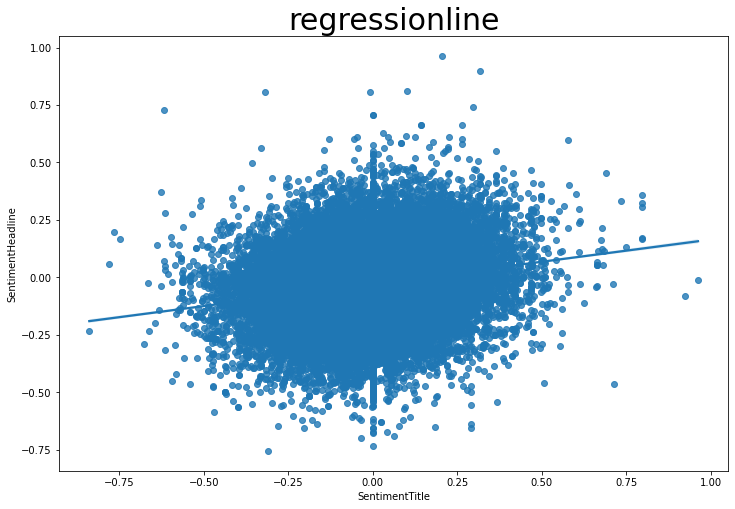

In [5]:
plt.figure(figsize=(12,8))
sns.regplot(x='SentimentTitle', y='SentimentHeadline',data=train, ci=95)
plt.title('regressionline', fontsize=30)

Text(0.5, 1.0, 'Facebook_SentimentHeadline')

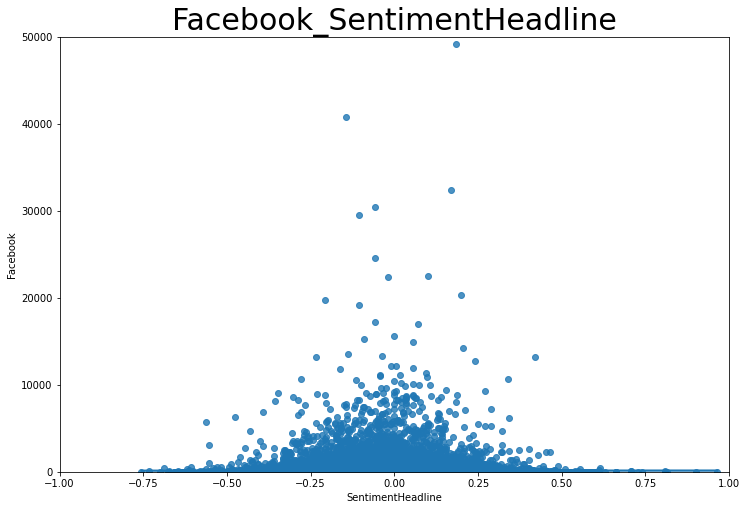

In [7]:
plt.figure(figsize=(12,8))
plt.xlim(-1.00,1.00) # x軸の表示範囲
plt.ylim(0, 50000) # y軸の表示範囲

sns.regplot(x='SentimentHeadline', y='Facebook',data=train, ci=95)
plt.title('Facebook_SentimentHeadline', fontsize=30)

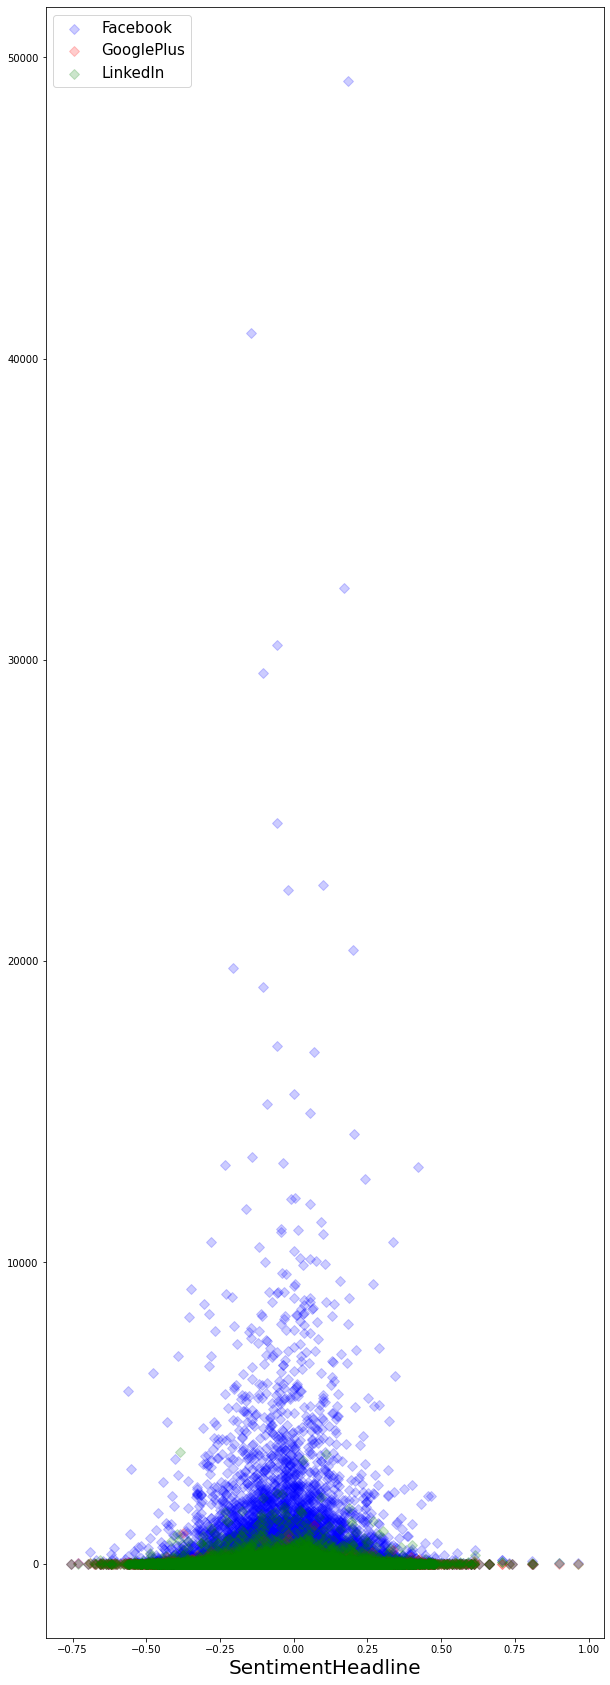

In [19]:
plt.figure(figsize=(10,30))
plt.scatter(train["SentimentHeadline"],train["Facebook"], s=50, c="b",
                  marker="D", alpha=0.2,label = 'Facebook')
plt.scatter(train["SentimentHeadline"],train["GooglePlus"], s=50, c="r",
                  marker="D", alpha=0.2,label = 'GooglePlus')
plt.scatter(train["SentimentHeadline"],train["LinkedIn"], s=50, c="g",
                  marker="D", alpha=0.2,label = 'LinkedIn')
plt.xlabel("SentimentHeadline", fontsize=20) 
plt.legend(loc="upper left", fontsize=15) 
plt.show()

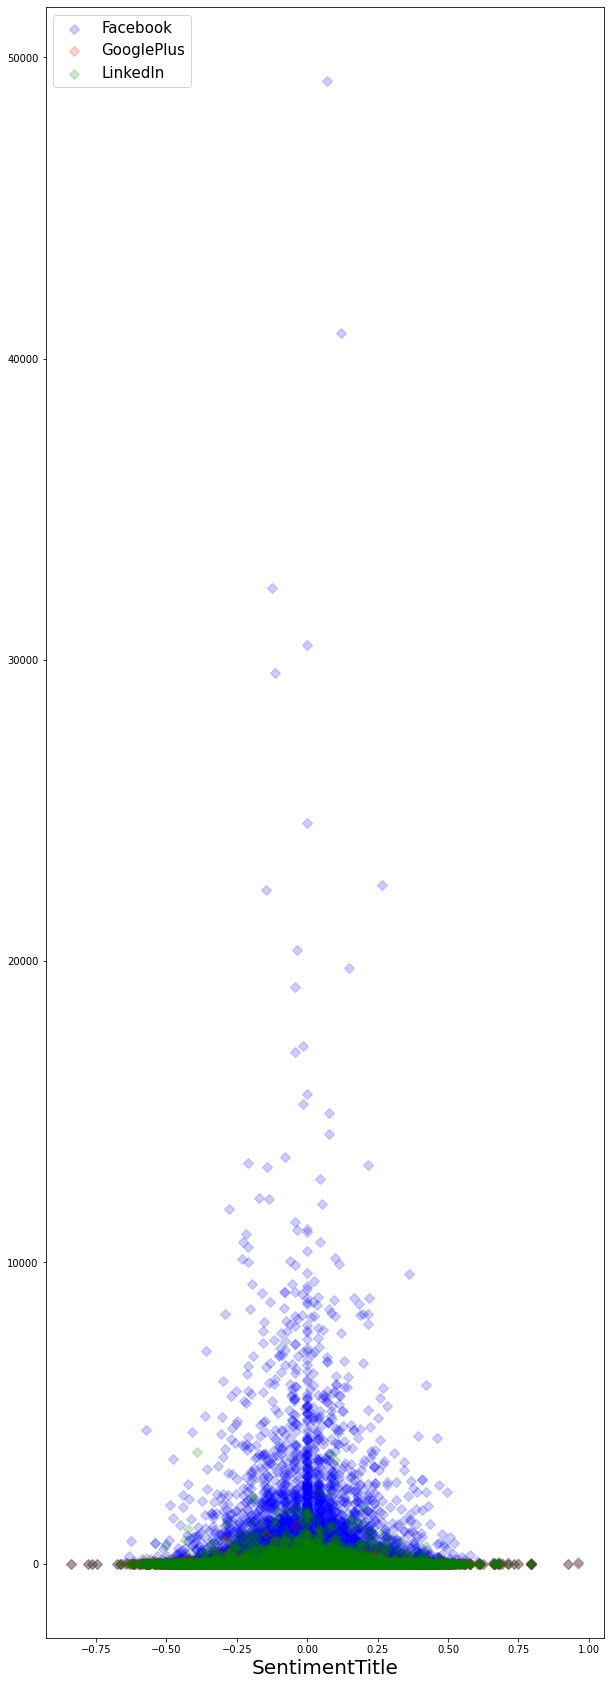

In [20]:
plt.figure(figsize=(10,30))
plt.scatter(train["SentimentTitle"],train["Facebook"], s=50, c="b",
                  marker="D", alpha=0.2,label = 'Facebook')
plt.scatter(train["SentimentTitle"],train["GooglePlus"], s=50, c="r",
                  marker="D", alpha=0.2,label = 'GooglePlus')
plt.scatter(train["SentimentTitle"],train["LinkedIn"], s=50, c="g",
                  marker="D", alpha=0.2,label = 'LinkedIn')
plt.xlabel("SentimentTitle", fontsize=20) 
plt.legend(loc="upper left", fontsize=15) 
plt.show()

Text(0.5, 1.0, 'scatterplot')

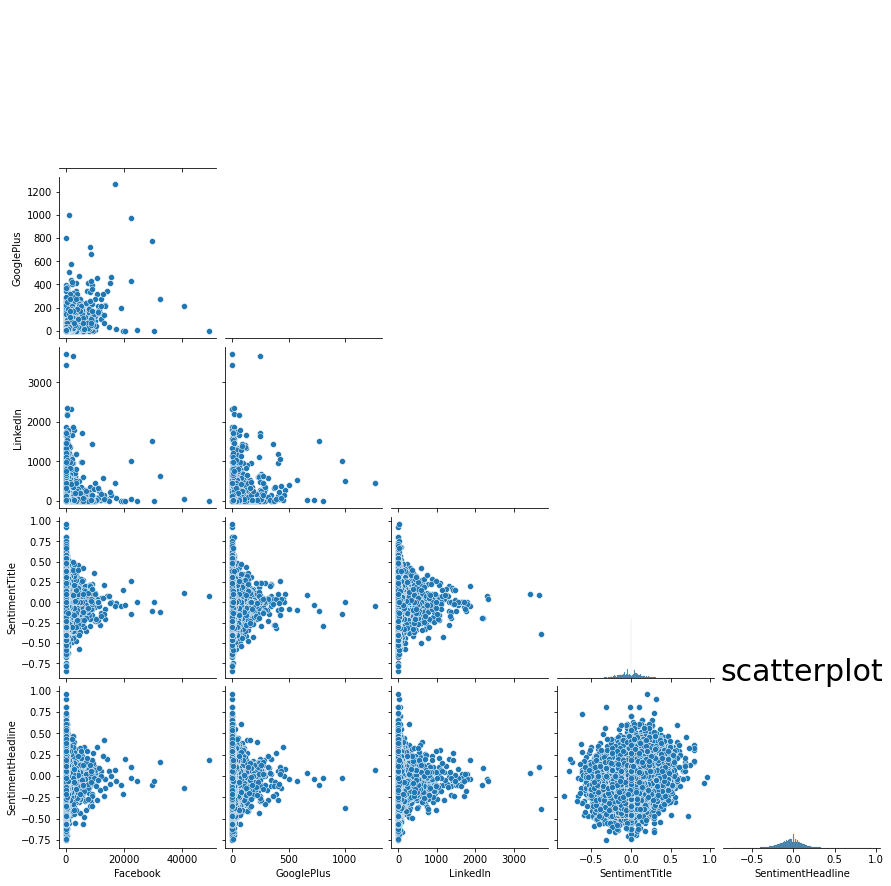

In [12]:
sns.pairplot(data=train, vars=["Facebook",	"GooglePlus",	"LinkedIn",	"SentimentTitle",	"SentimentHeadline"], corner=True)
plt.title('scatterplot', fontsize=30)

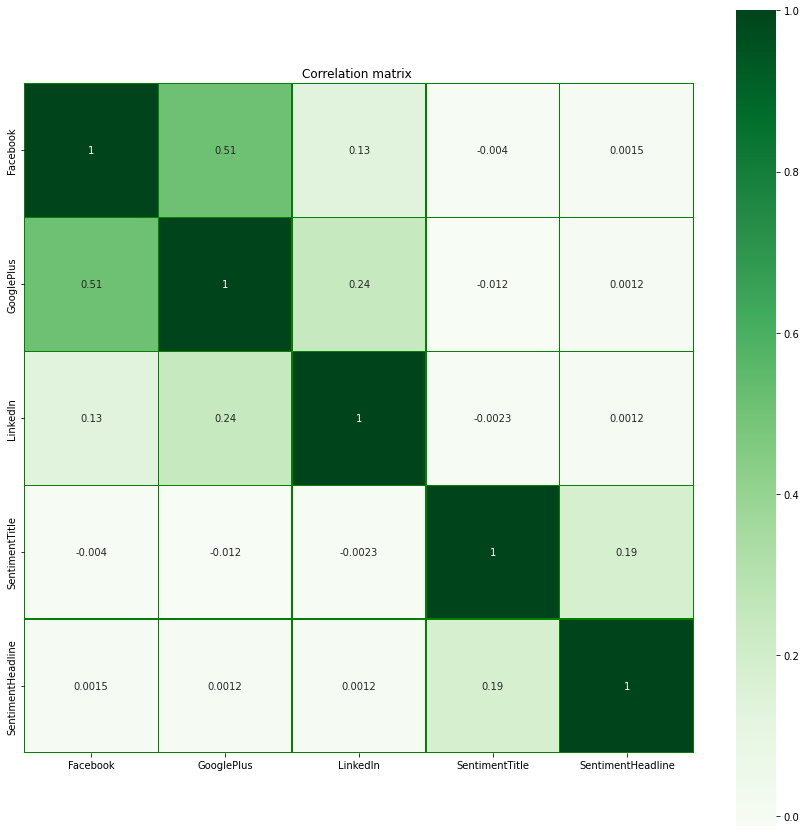

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(train[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Greens',linewidths=0.1,linecolor='g',annot=True)
plt.title('Correlation matrix ')

plt.show()